<a href="https://colab.research.google.com/github/guelpman/Priorizacion_Descuentos_Peru/blob/main/Sesion01_MachineLearning_DSW__FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
############## -- Machine Learning - DSW --##############################
# Tema : Desarrollo y Productivo de Algoritmos de Machine Learning
# Autor : André Chávez 
# email: andre.chavez@urp.edu.pe
# version: 1.0
#########################################################################

In [ ]:
##################################################
## Desarrollo de Modelos de Machine Learning
##################################################

In [ ]:
# Nos conectamos al Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
## Leemos las librerias necesarias para poder trabajar

In [ ]:
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
import warnings
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

%matplotlib inline
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## Leemos los datos o el dataset a trabajar

In [ ]:
# Leemos la data de desarrollo de modeolos
desarrll = pd.read_csv("/content/drive/My Drive/DSW - MachineLearning/train.csv") 
# Leer el dataset en un dataframe usando pandas

In [ ]:
desarrll.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
# Dimension
desarrll.shape
# Son 614 obs con 13 columnas

(614, 13)

In [ ]:
#Leer los primeros registros.
# Podemos ver la estructura de los datos, es el str de Python
desarrll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
## Analisis Exploratorio de los datos

In [ ]:
#### Recurso: https://www.analyticsvidhya.com/blog/2014/07/statistics/

In [ ]:
desarrll.describe() #Resumen de la información cuantitativa

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


La función describe () proporcionaría count - conteo o número de elementos, mean - media, standard deviation (std) - desviación estándar, min - mínimo, cuartiles y max - máximo en su salida. Sólo considera las variables en formato de número.

In [ ]:
# Gráficos para variables cuantitativas
#Histogramas y Cajas

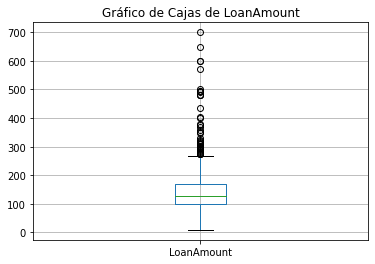

In [ ]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de LoanAmount')
#train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
desarrll.boxplot(column='LoanAmount')

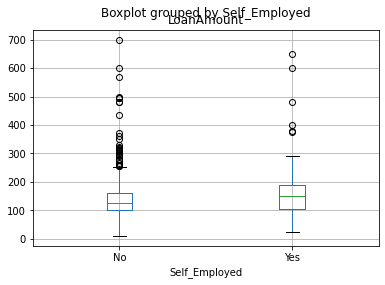

In [ ]:
desarrll.boxplot('LoanAmount',by='Self_Employed')

In [ ]:
desarrll.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
########################################
# Tratamiento de valores missings
########################################

In [ ]:
desarrll.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# No olvidemos separar las variables cualitativas para poder trabajarlas eficientemente
columnas_categoricas = ["Gender","Married","Education","Self_Employed","Property_Area","Dependents","Loan_Status"]

In [ ]:
# Separamos las columnas numericas
columnas_numericas = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

In [ ]:
# Visualizamos los valores perdidos respecto a las variables cualititativas
desarrll.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [ ]:
# Imputamos los valores cualitativos por Moda
desarrll.Gender = desarrll.Gender.fillna("Male")
desarrll.Married = desarrll.Married.fillna("Yes")
desarrll.Self_Employed = desarrll.Self_Employed.fillna("Yes")
desarrll.Credit_History = desarrll.Credit_History.fillna("1")
desarrll.Dependents = desarrll.Dependents.fillna("0")

In [ ]:
# Preprocesamiento con LabelEncoder
from sklearn.preprocessing import LabelEncoder # PasoN°01: Importo la libreria a usar
for c in columnas_categoricas:
    print(str(c))
    le = LabelEncoder()                     #   PasoN°02: Instancio la funcion a desarrollar
    le.fit(desarrll[str(c)])                #   PasoN°03: Ajusto la funcion
    desarrll[str(c)]=le.transform(desarrll[str(c)]) #   PasoN°04: Ejecuto la funcion

Gender
Married
Education
Self_Employed
Property_Area
Dependents
Loan_Status


In [ ]:
# Imputamos los valores cuantitativos por Media o Mediana
## Median
for c in columnas_numericas:
    median = desarrll[c].median()
    desarrll[c].fillna(median, inplace=True)

In [ ]:
# Revisamos si la recodigicación fue la idónea
desarrll.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
########################################
## Feature Enginnering ##
########################################

In [ ]:
## Creación de Variables por Decision de Negocio o de acuerdo a metodologías más automatizadas es el
# corazon de Machine Learning
# También conocido como proceso de Feature Engineering, no olvidar que todo lo que le hacemos al Train o Entrenamiento se lo
# debemos hacer a la data de scoreo o data productiva.

In [ ]:
# Ingenieria de datos
#Creamos las variables para el entrenamiento o train

desarrll['TotalIncome']    = desarrll['ApplicantIncome'] + desarrll['CoapplicantIncome']
desarrll['Log_LoanAmount'] = round(np.log(desarrll['LoanAmount']+1),2)

In [ ]:
desarrll['AmountxTerm']    = round(desarrll['LoanAmount']/desarrll['Loan_Amount_Term'],2)
desarrll["Cuota_Ingreso1"] = (1000*desarrll["LoanAmount"]/desarrll["Loan_Amount_Term"])/(desarrll["ApplicantIncome"])
desarrll["Cuota_Ingreso2"] = (1000*desarrll["LoanAmount"]/desarrll["Loan_Amount_Term"])/(desarrll["TotalIncome"])
desarrll["Cuota_Ingreso_Hijo"] = (1000*desarrll["LoanAmount"]/desarrll["Loan_Amount_Term"])/(desarrll["TotalIncome"]/(desarrll["Dependents"]+1))


In [ ]:
# Revisamos las variables creadas, derrepente queremos crear algunas más?
#desarrll.shape

In [ ]:
########################################
# Particion Muestral de los datos
########################################

In [ ]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
desarrll = desarrll.drop('Loan_ID',axis=1)

In [ ]:
## Si deseamos balancear, podemos hacerlo con toda la informacion?
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(desarrll.drop('Loan_Status', axis=1), # (X,y,%test,estratificacion)
                                                    desarrll['Loan_Status'], 
                                                    test_size=0.30,
                                                    stratify=desarrll['Loan_Status'],
                                                    random_state=100)

In [ ]:
########################################
# Selección de Variables
########################################

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Seleccion por Random Forest
from sklearn.ensemble import RandomForestClassifier # Paso01: Instancio el algoritmo
forest = RandomForestClassifier()                   # Paso02: Configuro el algoritmo
forest.fit(X_train, y_train)                        # Paso03: Ajuste el algoritmo
importances = forest.feature_importances_           # Variables importantes


In [ ]:
# Seleccion por Random Forest
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(X_train.columns)}),
                              pd.DataFrame({'Importancia':list(forest.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,Credit_History,0.228006
1,TotalIncome,0.092233
2,Cuota_Ingreso1,0.091105
3,Cuota_Ingreso2,0.087735
4,Cuota_Ingreso_Hijo,0.082622
5,ApplicantIncome,0.079962
6,LoanAmount,0.067589
7,Log_LoanAmount,0.062512
8,AmountxTerm,0.059159
9,CoapplicantIncome,0.047807


In [ ]:
########################################
# Modelamiento de los datos
########################################

In [ ]:
## Modelos Supervisados : Regresión Logística Binaria ##

In [ ]:
# Paso N°01: Llamar un algoritmo predictivos
from sklearn.linear_model import LogisticRegression

RegLog = LogisticRegression() # Paso N°02: Configuro el algoritmo
RegLog.fit(X_train, y_train)  # Paso N°03: Entreno o ajusto el algoritmo predictivo a los datos


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=RegLog.predict(X_train) # Prediccion sobre el train
y_pred_test= RegLog.predict(X_test) # Prediccion sobre el test

In [ ]:
# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[ 60  74]
 [  6 289]]
Matriz confusion: Test
[[ 24  34]
 [  1 126]]
Accuracy: Train
0.8135198135198135
Accuracy: Test
0.8108108108108109
Precision: Train
0.7961432506887053
Precision: Test
0.7875
Recall: Train
0.9796610169491525
Recall: Test
0.9921259842519685


In [ ]:
## Modelos Boosting : XGBoost ##
! pip install xgboost

In [ ]:
# Importamos la librería necesaria para el algoritmo
import xgboost as xgb

In [ ]:
X_train.Credit_History = X_train.Credit_History.astype('int')
X_test.Credit_History = X_test.Credit_History.astype('int')

In [ ]:
# En Xgboost necesitamos convertir nuestras matrices a matriz XGboost
# Uso eficiente de la memoria y entrenamiento rápido
dtrain = xgb.DMatrix(data=X_train,label =  y_train)
dtest  = xgb.DMatrix(data= X_test,label =  y_test)

In [ ]:
# Eligiendo los parámetros para XGBoost
xgb_params = {
    "objective": "reg:logistic",
    "eta": 0.0001,
    "max_depth": 3,
    "early_stopping_rounds":  50,
    "gamma": 0.1,
    "eval_metric": "auc",
    "print_every_n": 50
}

num_rounds = 250 # Numero de arboles
# Aqui entrenamos el algoritmo
watch_list  = [(dtrain,'train'),(dtest,'test')]
xgb_fit = xgb.train(xgb_params, dtrain, num_rounds, watch_list) # Aca se guarda el algoritmo

[0]	train-auc:0.753744	test-auc:0.713888
[1]	train-auc:0.753959	test-auc:0.713888
[2]	train-auc:0.75401	test-auc:0.713888
[3]	train-auc:0.753959	test-auc:0.713888
[4]	train-auc:0.753959	test-auc:0.713888
[5]	train-auc:0.753959	test-auc:0.713888
[6]	train-auc:0.753959	test-auc:0.714363
[7]	train-auc:0.753959	test-auc:0.714363
[8]	train-auc:0.753959	test-auc:0.714363
[9]	train-auc:0.753959	test-auc:0.714363
[10]	train-auc:0.753959	test-auc:0.714363
[11]	train-auc:0.753959	test-auc:0.714363
[12]	train-auc:0.753908	test-auc:0.714363
[13]	train-auc:0.753959	test-auc:0.714363
[14]	train-auc:0.753908	test-auc:0.714363
[15]	train-auc:0.753858	test-auc:0.714363
[16]	train-auc:0.753908	test-auc:0.714363
[17]	train-auc:0.753858	test-auc:0.714363
[18]	train-auc:0.753858	test-auc:0.714363
[19]	train-auc:0.753858	test-auc:0.714363
[20]	train-auc:0.753858	test-auc:0.714363
[21]	train-auc:0.753858	test-auc:0.714363
[22]	train-auc:0.753858	test-auc:0.714363
[23]	train-auc:0.753858	test-auc:0.714363
[24

In [ ]:
# Importancia de Variables
frame = { 'Gain':        pd.Series(xgb_fit.get_score(importance_type='gain')),
          'Cover':       pd.Series(xgb_fit.get_score(importance_type='cover')),
          'Weight':      pd.Series(xgb_fit.get_score(importance_type='weight'))}
result = pd.DataFrame(frame) 
result    

,Gain,Cover,Weight
Credit_History,102.903711,107.241055,250
Cuota_Ingreso_Hijo,3.150034,52.620550,500
Cuota_Ingreso1,1.104377,9.872724,381
ApplicantIncome,2.956359,2.500000,4
TotalIncome,8.713230,90.993054,250
LoanAmount,1.732495,2.499938,121


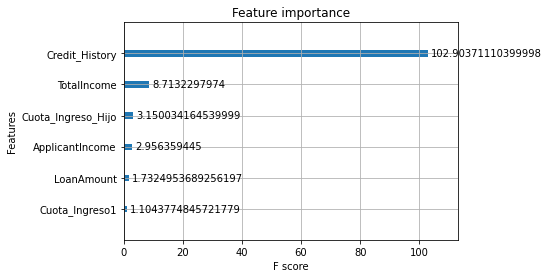

In [ ]:
# Podemos calcular la importancia de variables por Xgboost
xgb.plot_importance(xgb_fit,importance_type='gain')

In [ ]:
## Modelos Boosting : LightGBM ##
! pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
dtrain = lgb.Dataset(X_train, label=y_train)
dtest =  lgb.Dataset(X_test,  label=y_test, reference=dtrain)

In [ ]:
params = {
        'task':'train', 
        'is_unbalance': False, 
        'max_dept':1,
        'max_bin': 10,  # max cantidad de cortes de una var. numerica
        'boosting_type': 'gbdt',
        'objective': 'binary',
        #'min_child_weight': 150,
        'metric': 'auc',
        #'min_data_in_leaf': 250,
        'num_leaves': 5,
        'learning_rate': 0.0001,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 10,
        #'min_data_per_group':150 ,
        'verbose': 0,
        'seed ':1234,
        'is_unbalance':True
}

In [ ]:
gbm = lgb.train(params,
                dtrain,
                num_boost_round=10000,
                valid_sets=[dtrain,dtest],
                early_stopping_rounds=100)

In [ ]:
importancia=gbm.feature_importance(importance_type='gain')

def impxgb(valores,variables):
    dictimp={variables[a]:valores[a] for a in range(0,len(variables)) }
    xgimp=sorted(list(dictimp.items()), key=lambda x: x[1],reverse=True)

    return xgimp

ixg=impxgb(importancia,X_train.columns)
pd.Series(ixg)

0        (Credit_History, 3780.3102951049805)
1         (Cuota_Ingreso2, 174.6280801296234)
2        (Cuota_Ingreso1, 150.55474042892456)
3              (Education, 95.64497065544128)
4      (CoapplicantIncome, 68.92885994911194)
5          (Property_Area, 68.89336967468262)
6        (ApplicantIncome, 39.06327033042908)
7                (Married, 27.51448965072632)
8            (TotalIncome, 26.77689027786255)
9                (Gender, 22.121349811553955)
10          (AmountxTerm, 21.210700273513794)
11    (Cuota_Ingreso_Hijo, 14.19530987739563)
12           (Dependents, 10.823490142822266)
13           (LoanAmount, 10.397259712219238)
14                       (Self_Employed, 0.0)
15                    (Loan_Amount_Term, 0.0)
16                      (Log_LoanAmount, 0.0)
dtype: object

In [ ]:
##################################################
## Implementación de Modelos de Machine Learning
##################################################

In [ ]:
# Leemos el dataset de implementacion, podria ser una informacion a enivar a campanas
implemt = pd.read_csv("/content/drive/My Drive/DSW - MachineLearning/test.csv") 

In [ ]:
# Todo lo realizado en el dataset de entrenamiento del modelo lo debemos replicar en el dataset de scoring

In [ ]:
# Imputamos los valores cualitativos por Moda
implemt.Gender = implemt.Gender.fillna("Male")
implemt.Married = implemt.Married.fillna("Yes")
implemt.Self_Employed = implemt.Self_Employed.fillna("Yes")
implemt.Credit_History = implemt.Credit_History.fillna("1")
implemt.Dependents = implemt.Dependents.fillna("0")

In [ ]:
# Separamos los features categoricos y los numericos
columnas_categoricas = ["Gender","Married","Education","Self_Employed","Property_Area","Dependents"]
columnas_numericas = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

In [ ]:
# Preprocesamiento con LabelEncoder
from sklearn.preprocessing import LabelEncoder
for c in columnas_categoricas:
    print(str(c))
    le = LabelEncoder()
    le.fit(implemt[str(c)])
    implemt[str(c)]=le.transform(implemt[str(c)]) 

Gender
Married
Education
Self_Employed
Property_Area
Dependents


In [ ]:
# Imputamos los valores cuantitativos por Media o Mediana
for c in columnas_numericas:
    median = implemt[c].median()
    implemt[c].fillna(median, inplace=True)

In [ ]:
implemt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
#implemt.ApplicantIncome.value_counts()

In [ ]:
# Ingenieria de datos
#Creamos las mismas variables que utilizamos en el train
implemt['TotalIncome']    = implemt['ApplicantIncome'] + implemt['CoapplicantIncome']
implemt['Log_LoanAmount'] = round(np.log(implemt['LoanAmount']+1),2)

In [ ]:
implemt['AmountxTerm']    = round(implemt['LoanAmount']/implemt['Loan_Amount_Term'],2)
implemt["Cuota_Ingreso1"] = (1000*implemt["LoanAmount"]/implemt["Loan_Amount_Term"])/(implemt["ApplicantIncome"] +1)
implemt["Cuota_Ingreso2"] = (1000*implemt["LoanAmount"]/implemt["Loan_Amount_Term"])/(implemt["TotalIncome"] +1)
implemt["Cuota_Ingreso_Hijo"] = (1000*implemt["LoanAmount"]/implemt["Loan_Amount_Term"])/(implemt["TotalIncome"]/(implemt["Dependents"]+1))


In [ ]:
## Una vez que tenemos todas las variables podemos scorear o puntuar los registros

In [ ]:
implemt.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Log_LoanAmount,AmountxTerm,Cuota_Ingreso1,Cuota_Ingreso2,Cuota_Ingreso_Hijo
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1,2,5720,4.71,0.31,0.053409,0.053409,0.053419


In [ ]:
df_scoring = implemt.drop("Loan_ID",axis=1)

In [ ]:
df_scoring.Credit_History = df_scoring.Credit_History.astype('int')

In [ ]:
df_scoring.shape

(367, 17)

In [ ]:
# Predecimos con la data nueva
y_scoring = gbm.predict(df_scoring)

In [ ]:
# Convertir la probabilidad en clase
for i in range(0,367):
    if y_scoring[i]>=0.50:
        y_scoring[i]=1
    else:
        y_scoring[i]=0

In [ ]:
# Predecimos sobre el set de datos de implementacion con el modelo entrenado
#y_scoring = RegLog.predict(df_scoring) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
# Juntamos el ID con la clase
data = np.hstack((implemt['Loan_ID'].values.reshape(-1,1), y_scoring.reshape(-1,1)))
# Le asignamos nombres a las columnas
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
# Convertimos al formato solicitado por Analytics Vidhya
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
# Exportamos la solucion
df_submmit.to_csv('/content/drive/My Drive/DSW - MachineLearning/Sol_Lgbm.csv', index=False)

In [ ]:
# Predecimos con la data nueva
y_scoring = RegLog.predict(df_scoring)
# Convertir la probabilidad en clase
for i in range(0,367):
    if y_scoring[i]>=0.50:
        y_scoring[i]=1
    else:
        y_scoring[i]=0

In [ ]:
# Predecimos sobre el set de datos de implementacion con el modelo entrenado
#y_scoring = RegLog.predict(df_scoring) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
# Juntamos el ID con la clase
data = np.hstack((implemt['Loan_ID'].values.reshape(-1,1), y_scoring.reshape(-1,1)))
# Le asignamos nombres a las columnas
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
# Convertimos al formato solicitado por Analytics Vidhya
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
# Exportamos la solucion
df_submmit.to_csv('/content/drive/My Drive/DSW - MachineLearning/RegLog.csv', index=False)

In [ ]:


X_train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Log_LoanAmount,AmountxTerm,Cuota_Ingreso1,Cuota_Ingreso2,Cuota_Ingreso_Hijo
544,0,1,0,1,0,3017,663.0,102.0,360.0,1,1,3680.0,4.63,0.28,0.093912,0.076993,0.076993
13,1,0,0,0,0,1853,2840.0,114.0,360.0,1,0,4693.0,4.74,0.32,0.170894,0.067476,0.067476
383,1,0,0,0,1,7167,0.0,128.0,360.0,1,2,7167.0,4.86,0.36,0.049610,0.049610,0.049610


In [ ]:
df_scoring.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Log_LoanAmount,AmountxTerm,Cuota_Ingreso1,Cuota_Ingreso2,Cuota_Ingreso_Hijo
0,1,1,0,0,0,5720,0,110.0,360.0,1,2,5720,4.71,0.31,0.053409,0.053409,0.053419
1,1,1,1,0,0,3076,1500,126.0,360.0,1,2,4576,4.84,0.35,0.113747,0.076469,0.152972
2,1,1,2,0,0,5000,1800,208.0,360.0,1,2,6800,5.34,0.58,0.115532,0.084955,0.254902


In [ ]:
dtest_split = xgb.DMatrix(df_scoring)

In [ ]:
# Predecimos con la data nueva
y_scoring = xgb_fit.predict(dtest_split)
# Convertir la probabilidad en clase
for i in range(0,367):
    if y_scoring[i]>=0.50:
        y_scoring[i]=1
    else:
        y_scoring[i]=0
# Predecimos sobre el set de datos de implementacion con el modelo entrenado
#y_scoring = RegLog.predict(df_scoring) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
# Juntamos el ID con la clase
data = np.hstack((implemt['Loan_ID'].values.reshape(-1,1), y_scoring.reshape(-1,1)))
# Le asignamos nombres a las columnas
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
# Convertimos al formato solicitado por Analytics Vidhya
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
# Exportamos la solucion
df_submmit.to_csv('/content/drive/My Drive/DSW - MachineLearning/xgb.csv', index=False)

NameError: ignored

In [ ]:
# Listo , objetivo cumplido

In [ ]:
# Fin !!